                                                    Product Name  Price
0   Xham mbrojtës PanzerGlass SmartWatch për Apple Watch 4/5/6 /   49.5
1   Xham mbrojtës PanzerGlass SmartWatch për Apple Watch 4/5 (44   52.5
2   Xham mbrojtës PanzerGlass SmartWatch për Fitbit Sense / Vers   39.5
3   Xham mbrojtës PanzerGlass SmartWatch për lloje të ndryshme t   29.5
4                      Rrip FIXED për smartwatch, 20mm, i kaltër   34.5
5                       Rrip FIXED për smartwatch, 20mm, i kaftë   34.5
6        Rrip silikoni FIXED për smartwatch, gjerësi 20mm, i kuq   17.5
7                          Orë Smart Aligator Watch Lite, e zezë  123.5
8                Orë smart Xiaomi Watch S1 Active GL, Ocean Blue  156.5
9                           Orë smart Xiaomi Watch S1 GL, e zezë  191.5
10                           Orë smart Redmi Watch 2 Lite, bezhë  134.5
11                     Orë smart Xiaomi Watch S1 GL, e argjendtë  189.5
12               Orë smart Xiaomi Watch S1 Active GL, Moon White

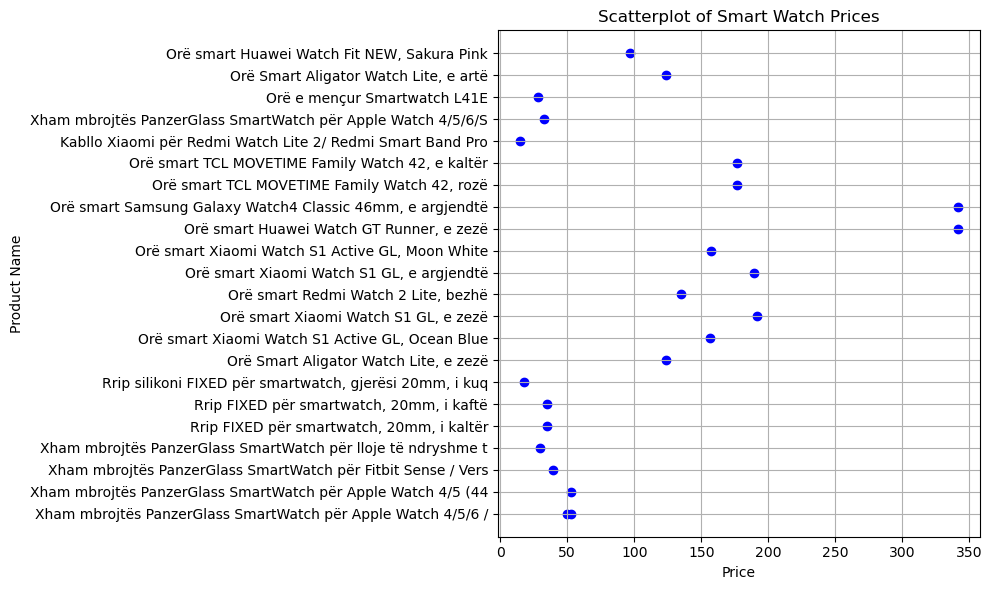

In [24]:
# Web scraping for smart watches in the biggest Kosovo based online shop. I used BeautifulSoup for web scraping. I extracted the names and the prices of the items


import requests
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt


smartwatch = []   # The list of Smart Watch models
prices = []     # The list of Smart Watch prices

sw = requests.get("https://gjirafa50.com/search?q=smart+watch")
sw = BeautifulSoup(sw.content, 'html.parser')

# print(sp.prettify())

for item in sw.find_all('a', href=True, attrs={'class':'text-gray-700 text-sm md:text-base product-title-lines hover:underline'}):
    model1 = item['title']
    modelname = model1[0:60]       #Since the names are too long, I confined the text to max 60 characters
    if modelname is None:    #in case the name is missing, None will replace it
        smartwatch.append(None)
    else:
        smartwatch.append(modelname) # Get the text part

price_elements = sw.find_all('span', class_='price font-semibold text-gray-700 text-base md:text-xl')
for price_element in price_elements:
    price = price_element.text.strip()               # The price is in string format 
    size = len(price)
    price1 = price[:size-2]                          # Since the price at Gjirafa web has space and EUR symbol, we need to extreact them
    prices.append(float(price1.replace(',','')))     # Comma sign is removed to allow conversion to float 

# Organizing the scaped information data
df = pd.DataFrame({'Product Name': smartwatch, 'Price': prices}) 
print(df.to_string())


# Create a scatterplot graph
plt.figure(figsize=(10, 6))  # Adjustment of the size of the graph 
plt.scatter(df['Price'], df['Product Name'], marker='o', color='b')
plt.xlabel('Price')
plt.ylabel('Product Name')
plt.title('Scatterplot of Smart Watch Prices')
plt.grid(True)
plt.tight_layout()  # This will take care of labels to be presented at the graph

# Show the plot
plt.show()